In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Data Exploration

In [25]:
distance_rewards = pd.DataFrame.from_records([(d, 130 * d / 30) for d in range(1, 90)], columns=['distance', 'reward'])

In [33]:
distance_rewards.head(50)

,distance,reward
0,1,4.333333
1,2,8.666667
2,3,13.000000
3,4,17.333333
4,5,21.666667
5,6,26.000000
6,7,30.333333
7,8,34.666667
8,9,39.000000
9,10,43.333333


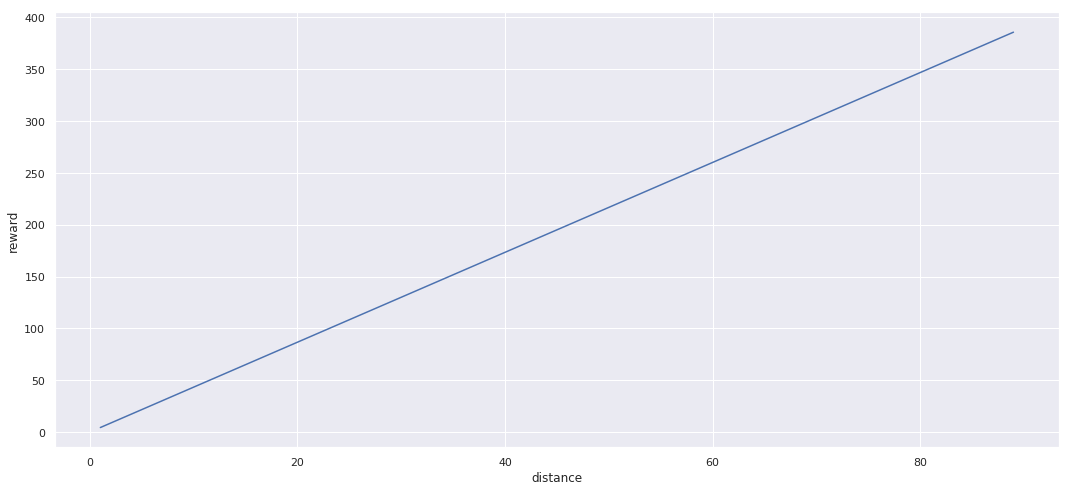

In [32]:
plt.figure(figsize=(18,8))
sns.lineplot(x="distance", y="reward", data=distance_rewards)
plt.show()

## Analysis

In [41]:
ddpg = pd.read_csv("results/ddpg_5_17/ddpg.csv")

In [62]:
def data_stats(data):
    print(f"Number of episodes: {len(data)}")
    print(f"Max episode reward: {data.episode_reward.max()}")
    print(f"Best timestep reward: {data.max_reward.max()}")
    tested_episodes = data[data.test_episode_reward_mean != -1000].dropna()
    best_test_episode = tested_episodes.sort_values('test_episode_reward_mean', ascending=False).iloc[0]
    print(f"Number of tested episodes: {len(tested_episodes)}")
    print(f"Best tested avg episode reward: {best_test_episode.test_episode_reward_mean} - episode {best_test_episode.episode}")

    print()
    
    tmrs = []

    for i in range(len(data) // 100):
        tmr = data[100*i:100*i + 100].episode_reward.mean()
        tmrs.append(tmr)
        print(tmr)

    print(f"Max TMR: {max(tmrs)}")
          
    print()

    for i in range(len(data) // 100):
        print(data[100*i:100*i + 100].max_reward.mean())

In [69]:
def analyze_data(data, q_losses=['mean_q_loss']):
    data_stats(data)
    
    number_charts = 3 + len(q_losses)
    
    plt.figure(figsize=(20,35))
    ax = plt.subplot(number_charts, 1, 1)
    ax.set_ylim(-350, 350)
    sns.lineplot(x="episode", y="episode_reward", data=data, ax=ax)
    
    ax = plt.subplot(number_charts, 1, 2)
    ax.set_ylim(-350, 350)
    sns.lineplot(x="episode", y="test_episode_reward_mean", data=data[data.test_episode_reward_mean != -1000], ax=ax)
    
    ax = plt.subplot(number_charts, 1, 3)
    sns.lineplot(x="episode", y="mean_pi_loss", data=data, ax=ax)
    
    for i, q_loss in enumerate(q_losses):
        ax = plt.subplot(number_charts, 1, 4 + i)
        sns.lineplot(x="episode", y=q_loss, data=data, ax=ax)

Number of episodes: 20000
Max episode reward: 287.9020402543013
Best timestep reward: 1.0744471430182456
Number of tested episodes: 112
Best tested avg episode reward: 270.44083080981216 - episode 19709

-121.526601086
-116.526741452
-117.092552078
-127.54781326
-108.894480407
-64.6042191445
-20.4037699567
-73.8639910871
-62.240846235
-56.247367707
-66.8847658255
-63.0450796598
-66.1798226853
-63.6226324644
-83.9918568368
-118.098035648
-122.566064832
-122.989867575
-90.9699446107
-79.6752085334
-48.6818655754
-79.2713111277
-96.5755228206
-66.5633292192
-24.4824420054
-14.3941098721
-63.2343380086
-49.1819387082
-48.61050707
-62.998739675
-73.3560077561
-44.95641015
-44.6919480299
-52.1622796295
-70.8614315245
-71.0111708291
-75.0854898219
-70.1990611776
-60.3890195178
-87.536848099
-78.2065043063
-65.038161941
-82.9222369227
-71.5522570631
-66.4675349875
-79.8489164162
-109.730554077
-111.055434515
-129.564462896
-57.9201533257
-80.8466375584
-87.0308212301
-76.7982733882
-72.7200332

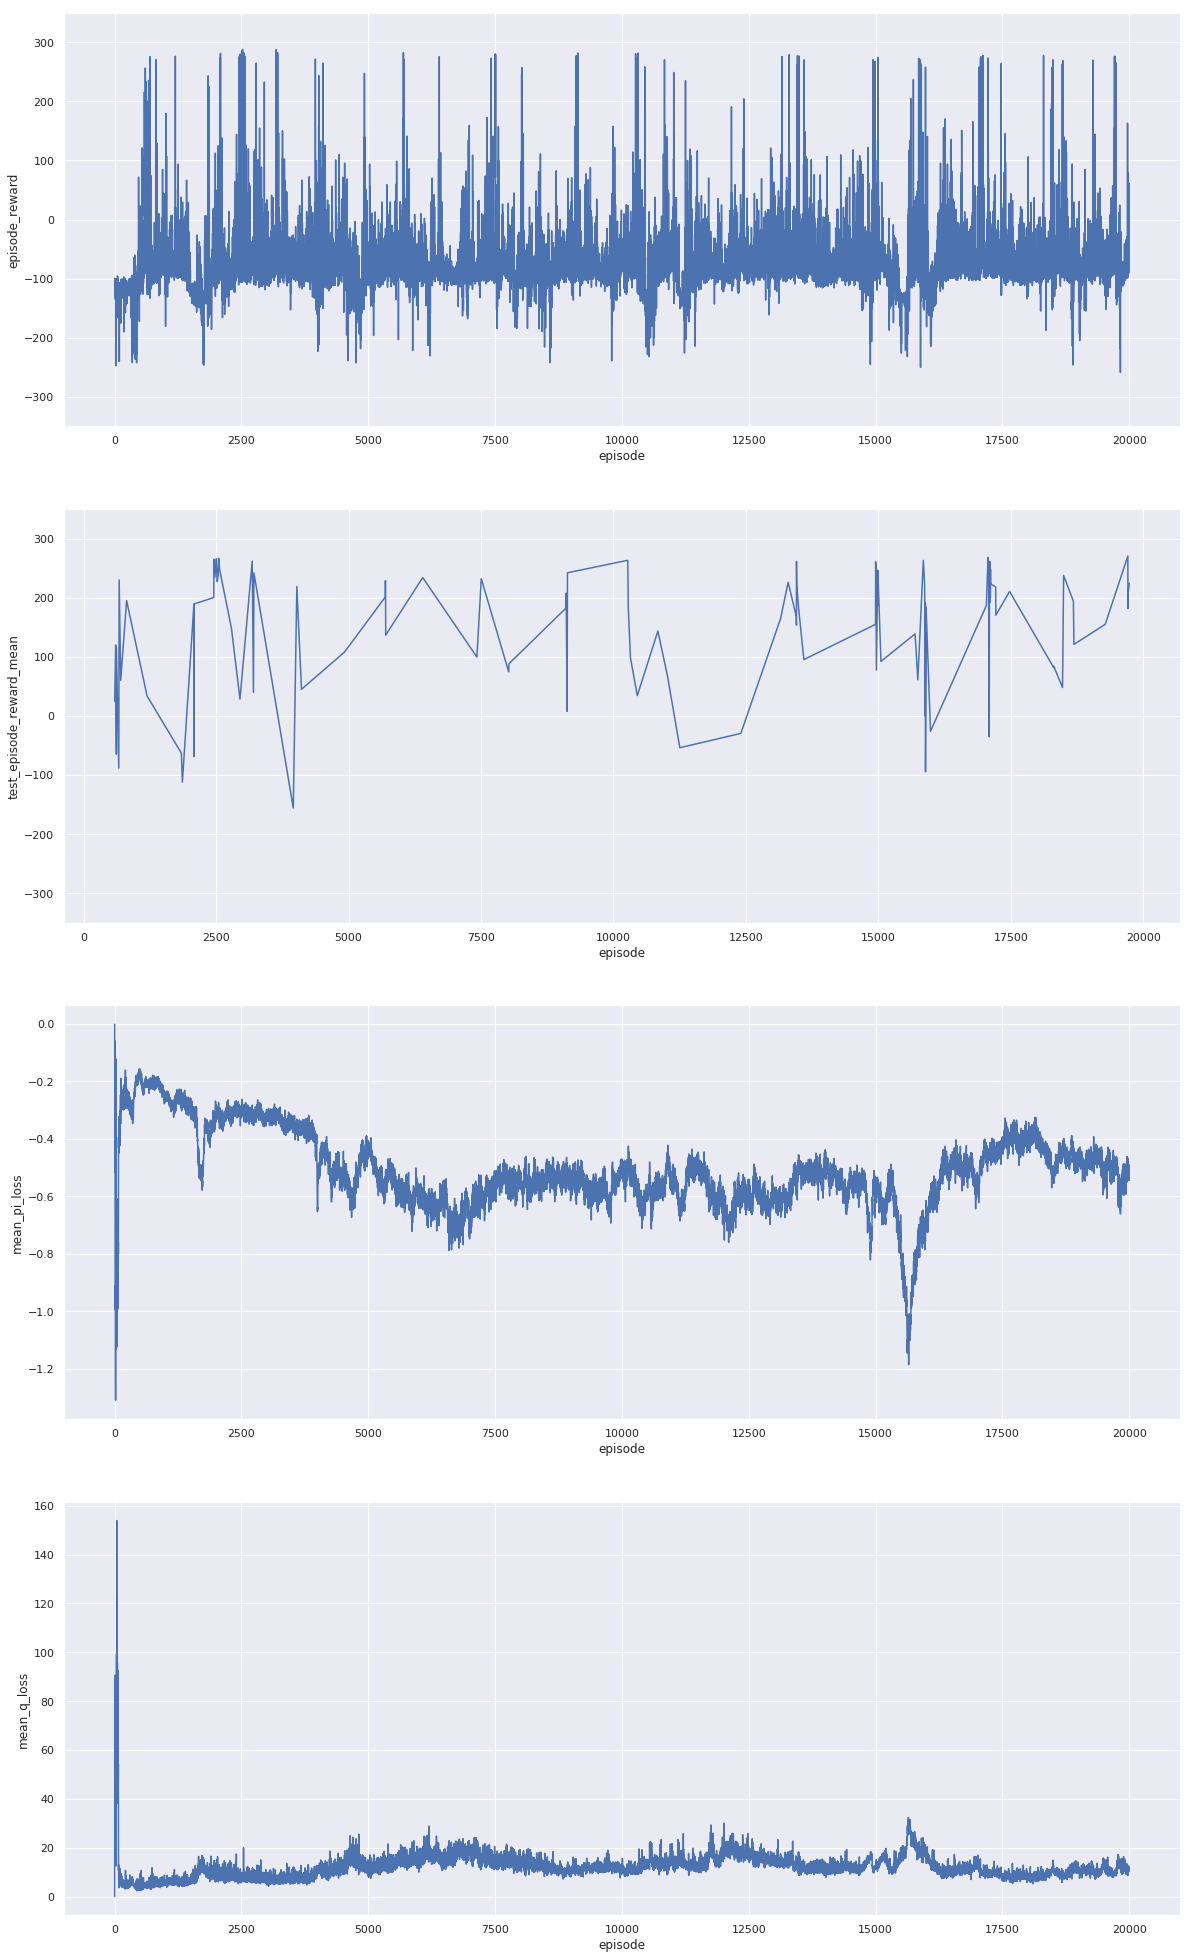

In [70]:
analyze_data(ddpg)

Number of episodes: 11721
Max episode reward: 291.90358667088003
Best timestep reward: 0.8099260041912348
Number of tested episodes: 6031
Best tested avg episode reward: 284.3977430384421 - episode 4262

-110.059205266
-123.210370886
-123.836547609
-117.785842285
-111.144367278
-100.905274487
-13.9233349956
41.5517360427
118.735958047
189.120305135
209.609657686
196.231502528
152.438709123
149.695783641
211.192314043
227.551627049
206.351844699
152.114388313
169.367631345
68.3894940844
135.356668061
163.607672916
127.910107151
153.303203443
113.119403106
145.983594898
116.666606223
109.326320095
90.1497773669
174.588008703
54.4720440049
80.511794902
156.642098759
183.999412188
202.585105613
153.685963271
227.318363636
252.340952861
131.64363917
199.994386546
183.482769571
111.35986756
184.394752077
77.3777596319
70.3362649466
133.862278437
151.002815401
154.595283151
221.632120858
147.790676978
59.0432538435
123.592767702
91.5682590707
22.1656868389
51.8875256895
-11.8045514371
118.785

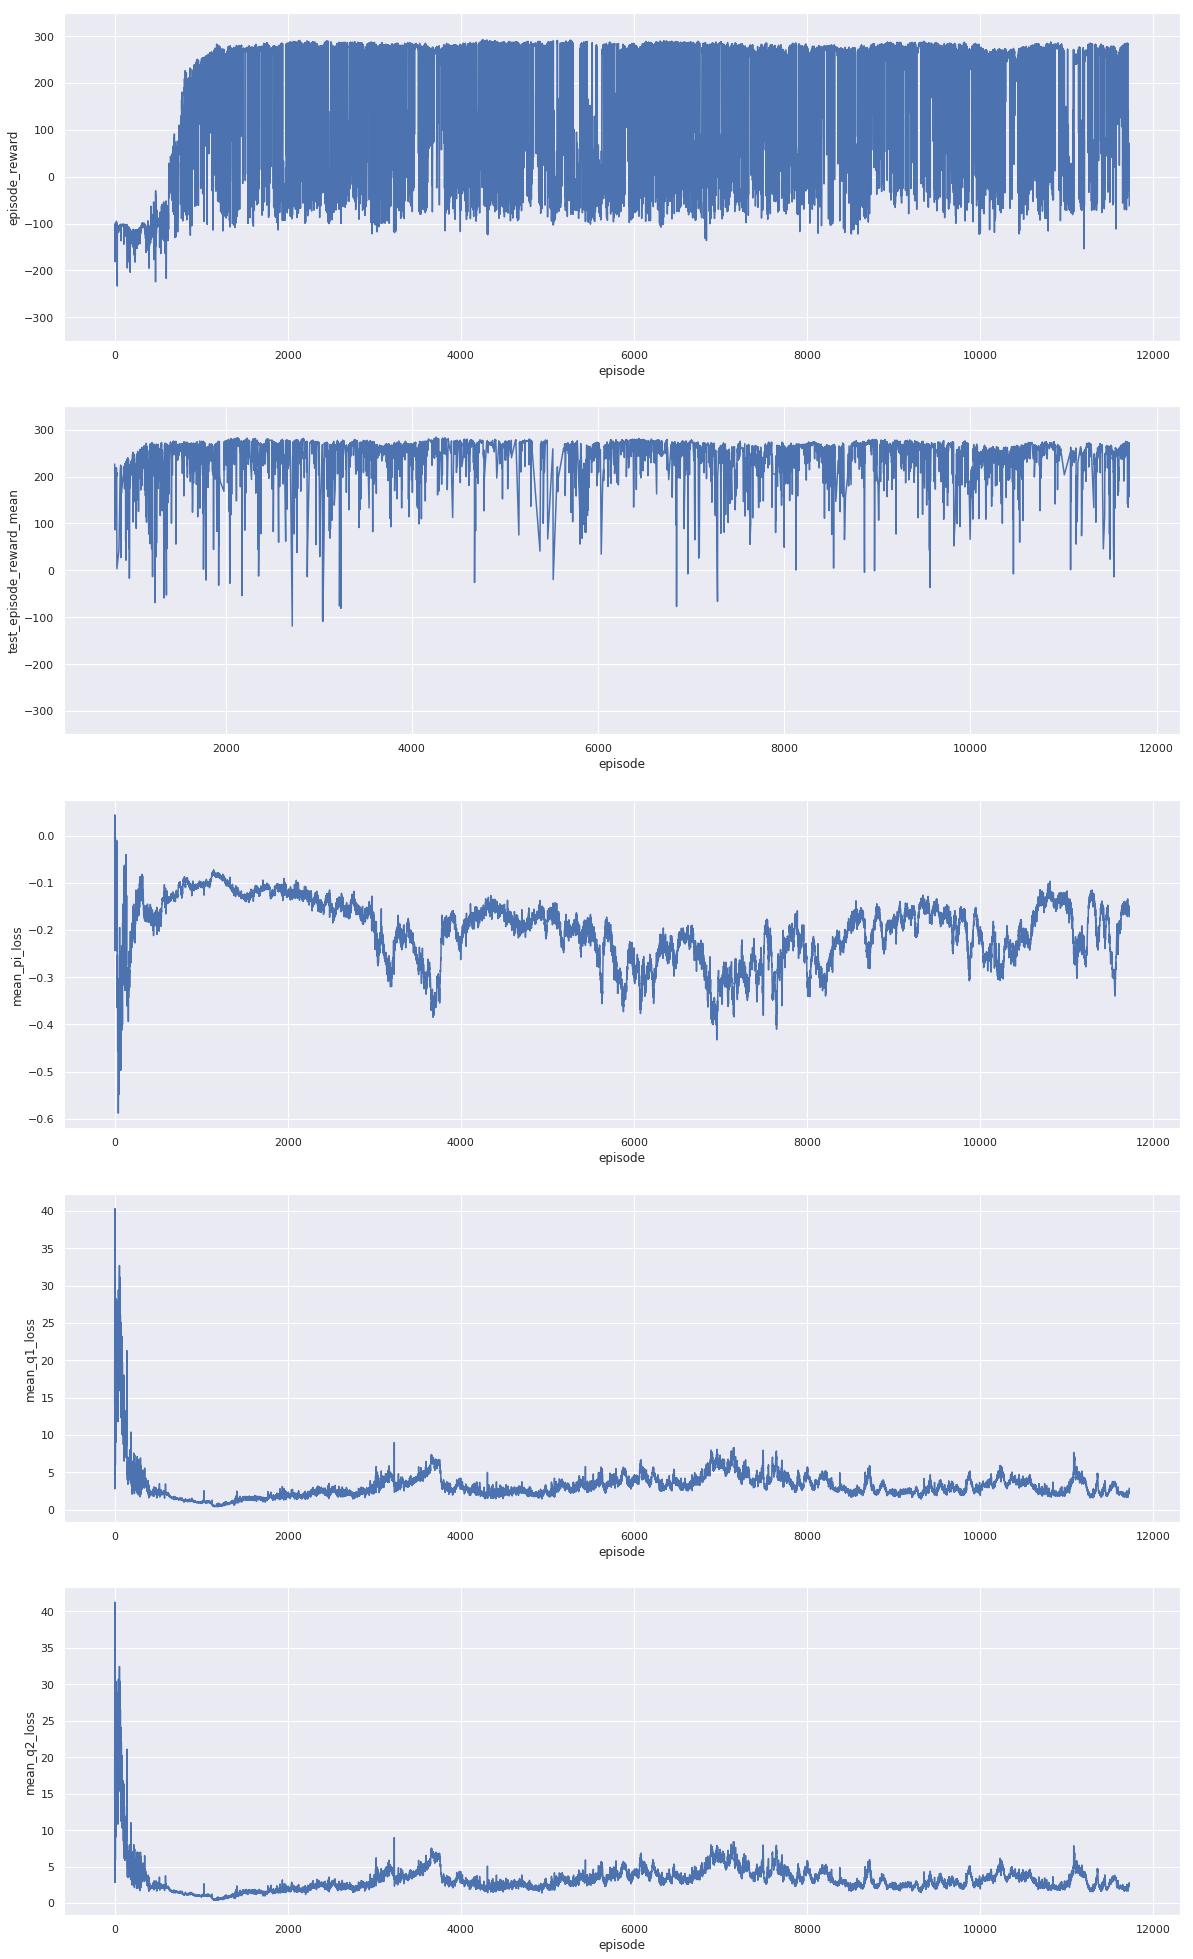

In [71]:
td3 = pd.read_csv("results/td3/td3.csv")
analyze_data(td3, q_losses=["mean_q1_loss", "mean_q2_loss"])

In [35]:
len(ddpg)

20000

In [12]:
ddpg[ddpg.test_episode_reward_mean != -1000].head(100)

,episode,steps,episode_reward,max_reward,min_reward,game_over,hull_position_x,hull_position_y,hull_linearVelocity_x,hull_linearVelocity_y,max_pi_loss,min_pi_loss,mean_pi_loss,max_q_loss,min_q_loss,mean_q_loss,test_episode_reward_mean,test_episode_reward_max,test_episode_reward_min
585,586,1600,215.788982,0.833689,-0.390008,False,85.730011,5.370065,1.405783,-1.284339,-0.034102,-0.540408,-0.216537,215.868990,0.454405,4.469140,24.638714,219.805570,-70.834451
604,605,1299,256.402845,0.642150,-0.339652,False,88.735130,5.779983,3.874871,-1.224616,0.014471,-0.544132,-0.193000,211.980550,0.467325,4.749258,119.928951,248.009269,-43.647777
617,618,1554,233.736823,0.737866,-0.246021,False,88.668594,5.824291,3.540871,0.799310,0.001158,-0.743119,-0.218708,234.013260,0.366577,4.402824,-64.883793,119.140085,-114.566668
618,619,1600,202.552326,0.648702,-0.248815,False,81.120605,5.421943,1.526664,0.875672,-0.039263,-0.591942,-0.203477,220.136950,0.378543,4.625031,115.024837,149.493143,84.779540
662,663,1600,201.016957,0.593408,-0.497347,False,79.856583,5.342577,4.035398,-1.567027,-0.023504,-0.536843,-0.202408,206.352450,0.452032,4.187638,-88.606090,243.349000,-166.070318
670,671,1575,235.393717,0.551220,-0.265366,False,88.708183,5.367158,3.497667,-2.558660,-0.041563,-0.518247,-0.208366,234.956850,0.483946,4.529701,229.934974,260.923859,21.942177
699,700,1067,275.715448,0.596797,-0.250783,False,88.766670,5.463908,5.093801,-0.227763,0.026338,-0.657699,-0.227951,235.303700,0.321891,4.196173,60.052346,276.735167,-110.231310
810,811,1082,270.859653,0.564324,-0.486793,False,88.727226,5.230944,5.495852,-2.226745,-0.003670,-0.515861,-0.215350,258.355600,0.601401,5.280321,195.138634,255.749983,77.505827
1196,1197,1038,276.292157,0.566889,-0.302512,False,88.738113,5.433826,5.113442,-0.103009,-0.058306,-0.759642,-0.286149,272.759550,0.686891,7.019879,33.700759,270.211920,-81.140354
1844,1845,1411,243.228638,0.558740,-0.289792,False,88.682007,5.146541,3.421319,-0.512355,-0.122145,-0.849278,-0.396355,360.497160,1.085474,7.826334,-63.196250,-5.369845,-129.197767


In [7]:
td3[td3.test_episode_reward_mean != -1000].head(100)

,episode,steps,episode_reward,max_reward,min_reward,game_over,hull_position_x,hull_position_y,hull_linearVelocity_x,hull_linearVelocity_y,...,mean_pi_loss,max_q1_loss,min_q1_loss,mean_q1_loss,max_q2_loss,min_q2_loss,mean_q2_loss,test_episode_reward_mean,test_episode_reward_max,test_episode_reward_min
806,807,1600,209.153569,0.538454,-0.225850,False,85.490875,4.999311,3.510281,-0.229236,...,-0.087041,34.494957,0.043057,1.145131,35.921660,0.042977,1.160852,226.818619,228.584990,222.925134
810,811,1600,202.474900,0.587767,-0.231185,False,83.830544,4.939790,2.077158,0.475677,...,-0.097636,34.042458,0.052176,1.161372,35.031895,0.050972,1.220408,86.314361,202.020949,-113.778506
811,812,1600,207.402540,0.552174,-0.257677,False,85.189323,4.891945,4.694716,-0.951624,...,-0.095329,31.657225,0.051562,1.243279,39.350140,0.049752,1.293984,158.664919,216.909556,-109.844908
813,814,1600,202.031150,0.525503,-0.208176,False,84.200989,4.838883,2.419589,-0.894549,...,-0.102183,28.090519,0.048744,1.225235,28.058838,0.045191,1.283133,205.017767,212.312801,187.487863
815,816,1595,226.564879,0.590651,-0.258184,False,88.727257,5.356715,3.112702,-0.469521,...,-0.105580,25.121016,0.061365,1.276133,28.777199,0.053175,1.261742,164.766564,222.449913,-21.979542
816,817,1600,212.849551,0.585871,-0.249458,False,85.615791,5.178113,2.441759,0.602857,...,-0.108926,43.088078,0.041283,1.312145,43.279785,0.042489,1.349766,194.602988,232.019338,-63.314634
817,818,1600,204.064265,0.476234,-0.234278,False,83.269730,5.201437,2.186316,-0.047156,...,-0.103101,19.903547,0.035676,1.189702,17.655964,0.029393,1.189945,199.633366,209.284836,185.098633
818,819,1600,200.945923,0.613937,-0.289609,False,83.043671,5.025448,2.464789,0.109902,...,-0.110115,33.498320,0.048570,1.429437,38.183530,0.051490,1.472608,116.957594,226.185781,-83.704246
822,823,1600,200.542659,0.577055,-0.305771,False,83.321045,5.336380,3.592014,-0.998189,...,-0.097446,26.241869,0.047433,1.236071,37.056480,0.051735,1.268744,219.157188,221.638430,215.422788
826,827,1600,202.082655,0.540308,-0.246024,False,83.538521,5.107584,2.158719,0.206087,...,-0.093387,54.971695,0.048938,1.140267,57.356730,0.048483,1.167603,217.833146,220.659538,212.673462


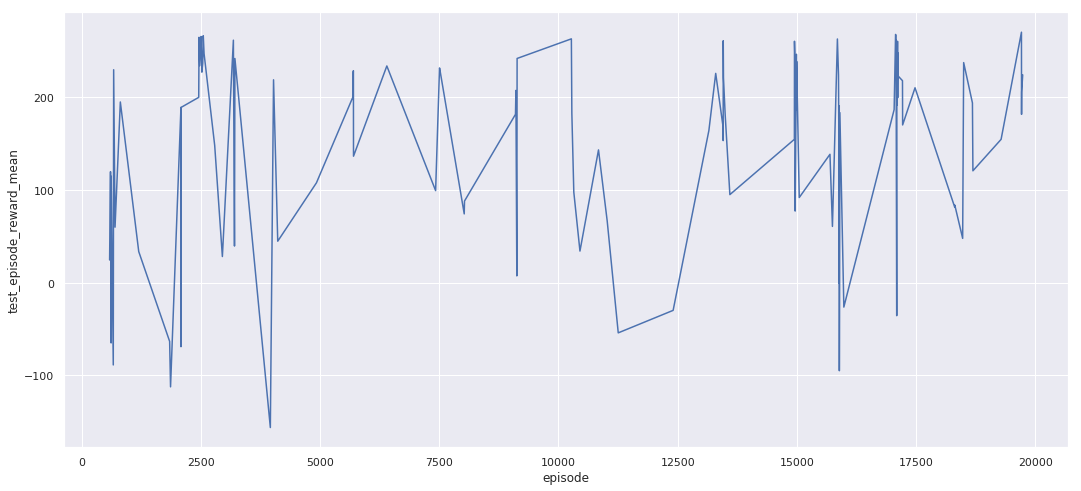

In [72]:
plt.figure(figsize=(18,8))
sns.lineplot(x="episode", y="test_episode_reward_mean", data=ddpg[ddpg.test_episode_reward_mean != -1000])
plt.show()

In [73]:
ddpg[ddpg.test_episode_reward_mean != -1000].head()

,episode,steps,episode_reward,max_reward,min_reward,game_over,hull_position_x,hull_position_y,hull_linearVelocity_x,hull_linearVelocity_y,max_pi_loss,min_pi_loss,mean_pi_loss,max_q_loss,min_q_loss,mean_q_loss,test_episode_reward_mean,test_episode_reward_max,test_episode_reward_min
585,586,1600,215.788982,0.833689,-0.390008,False,85.730011,5.370065,1.405783,-1.284339,-0.034102,-0.540408,-0.216537,215.86899,0.454405,4.469140,24.638714,219.805570,-70.834451
604,605,1299,256.402845,0.642150,-0.339652,False,88.735130,5.779983,3.874871,-1.224616,0.014471,-0.544132,-0.193000,211.98055,0.467325,4.749258,119.928951,248.009269,-43.647777
617,618,1554,233.736823,0.737866,-0.246021,False,88.668594,5.824291,3.540871,0.799310,0.001158,-0.743119,-0.218708,234.01326,0.366577,4.402824,-64.883793,119.140085,-114.566668
618,619,1600,202.552326,0.648702,-0.248815,False,81.120605,5.421943,1.526664,0.875672,-0.039263,-0.591942,-0.203477,220.13695,0.378543,4.625031,115.024837,149.493143,84.779540
662,663,1600,201.016957,0.593408,-0.497347,False,79.856583,5.342577,4.035398,-1.567027,-0.023504,-0.536843,-0.202408,206.35245,0.452032,4.187638,-88.606090,243.349000,-166.070318


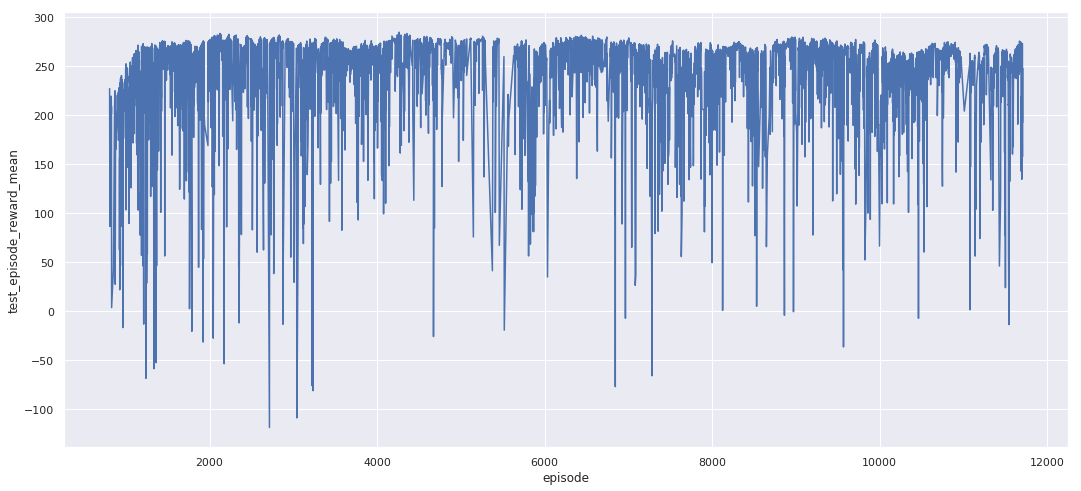

In [74]:
plt.figure(figsize=(18,8))
sns.lineplot(x="episode", y="test_episode_reward_mean", data=td3[td3.test_episode_reward_mean != -1000])
plt.show()

In [75]:
td3[td3.test_episode_reward_mean != -1000].head()

,episode,steps,episode_reward,max_reward,min_reward,game_over,hull_position_x,hull_position_y,hull_linearVelocity_x,hull_linearVelocity_y,...,mean_pi_loss,max_q1_loss,min_q1_loss,mean_q1_loss,max_q2_loss,min_q2_loss,mean_q2_loss,test_episode_reward_mean,test_episode_reward_max,test_episode_reward_min
806,807,1600,209.153569,0.538454,-0.225850,False,85.490875,4.999311,3.510281,-0.229236,...,-0.087041,34.494957,0.043057,1.145131,35.921660,0.042977,1.160852,226.818619,228.584990,222.925134
810,811,1600,202.474900,0.587767,-0.231185,False,83.830544,4.939790,2.077158,0.475677,...,-0.097636,34.042458,0.052176,1.161372,35.031895,0.050972,1.220408,86.314361,202.020949,-113.778506
811,812,1600,207.402540,0.552174,-0.257677,False,85.189323,4.891945,4.694716,-0.951624,...,-0.095329,31.657225,0.051562,1.243279,39.350140,0.049752,1.293984,158.664919,216.909556,-109.844908
813,814,1600,202.031150,0.525503,-0.208176,False,84.200989,4.838883,2.419589,-0.894549,...,-0.102183,28.090519,0.048744,1.225235,28.058838,0.045191,1.283133,205.017767,212.312801,187.487863
815,816,1595,226.564879,0.590651,-0.258184,False,88.727257,5.356715,3.112702,-0.469521,...,-0.105580,25.121016,0.061365,1.276133,28.777199,0.053175,1.261742,164.766564,222.449913,-21.979542


In [156]:
vpg = pd.read_csv("benchmark/bipedaltest/bipedaltest_s0/progress.txt", sep="\t")
vpg.tail()

,Epoch,AverageEpRet,StdEpRet,MaxEpRet,MinEpRet,EpLen,AverageVVals,StdVVals,MaxVVals,MinVVals,TotalEnvInteracts,LossPi,LossV,DeltaLossPi,DeltaLossV,Entropy,KL,Time
995,995,45.263670,126.523705,154.12454,-132.147870,1142.0000,40.008000,9.791950,48.236668,-71.180000,4780800,-0.008459,1255.04020,-0.000160,-745.88100,3.478400,0.000863,3001.253727
996,996,44.018690,109.795550,123.20486,-111.245285,1110.3334,41.805195,22.498123,52.499905,-89.093140,4785600,-0.007177,585.73816,-0.000540,-111.50778,3.501000,0.000304,3003.983165
997,997,53.790115,104.212425,141.76460,-92.596890,1144.3334,45.286602,23.305925,62.287926,-88.820590,4790400,0.015347,1150.67260,-0.000496,-357.69940,3.467116,-0.000240,3006.729362
998,998,-2.166872,117.677605,115.98879,-127.015854,866.2500,40.285763,24.035631,52.795937,-87.646835,4795200,0.030606,998.10565,-0.000662,-369.49512,3.488164,0.000975,3009.487429
999,999,115.661380,10.508542,124.14019,100.851900,1600.0000,44.350870,4.580121,53.435307,-42.848160,4800000,0.011837,408.24980,-0.000461,-88.31848,3.449455,0.000301,3013.421589


In [82]:
td3['TotalEnvInteracts'] = td3.steps.cumsum()
td3.tail()

,episode,steps,episode_reward,max_reward,min_reward,game_over,hull_position_x,hull_position_y,hull_linearVelocity_x,hull_linearVelocity_y,...,max_q1_loss,min_q1_loss,mean_q1_loss,max_q2_loss,min_q2_loss,mean_q2_loss,test_episode_reward_mean,test_episode_reward_max,test_episode_reward_min,TotalEnvInteracts
11716,11717,332,-1.477840,0.531365,-100.0,True,35.841080,4.433561,4.190001,1.448194,...,28.215750,0.122029,2.500117,19.219776,0.104216,2.468418,-1000.0,-1000.0,-1000.0,8615323
11717,11718,377,7.268736,0.534061,-100.0,True,38.835182,4.476675,4.820478,1.486428,...,28.641705,0.141903,2.312064,30.398668,0.137964,2.347363,-1000.0,-1000.0,-1000.0,8615700
11718,11719,542,56.768438,0.544229,-100.0,True,53.903610,4.456864,3.437041,1.291069,...,65.310090,0.113325,2.176103,70.956406,0.130259,2.275653,-1000.0,-1000.0,-1000.0,8616242
11719,11720,184,-57.026318,0.563651,-100.0,True,20.035887,3.990571,4.867743,1.006469,...,44.050350,0.141146,2.309290,32.991467,0.128607,2.312338,-1000.0,-1000.0,-1000.0,8616426
11720,11721,155,-62.469612,0.494383,-100.0,True,18.052784,4.540049,5.329268,1.054427,...,34.708700,0.149126,2.852090,34.149017,0.152845,2.804356,-1000.0,-1000.0,-1000.0,8616581


In [152]:
td3_epochs = pd.DataFrame(columns=['Epoch', 'AverageEpRet', 'TotalEnvInteracts'])

num_episodes = 10
for e in range(0, len(td3) // num_episodes):
    epoch_episodes = td3[num_episodes * (e + 1) - num_episodes:num_episodes * (e + 1)]
    td3_epochs = td3_epochs.append({'Epoch': e, 'AverageEpRet': epoch_episodes.episode_reward.mean(), 'TotalEnvInteracts': epoch_episodes.iloc[-1].TotalEnvInteracts}, ignore_index=True)

In [153]:
td3_epochs.tail()

,Epoch,AverageEpRet,TotalEnvInteracts
1167,1167.0,278.478941,8594319.0
1168,1168.0,148.878432,8600648.0
1169,1169.0,86.077790,8605604.0
1170,1170.0,190.637480,8612760.0
1171,1171.0,3.212507,8616426.0


In [154]:
e = 1
td3[3 * (e + 1) - 3:3 * (e + 1)].iloc[-1].TotalEnvInteracts

2695

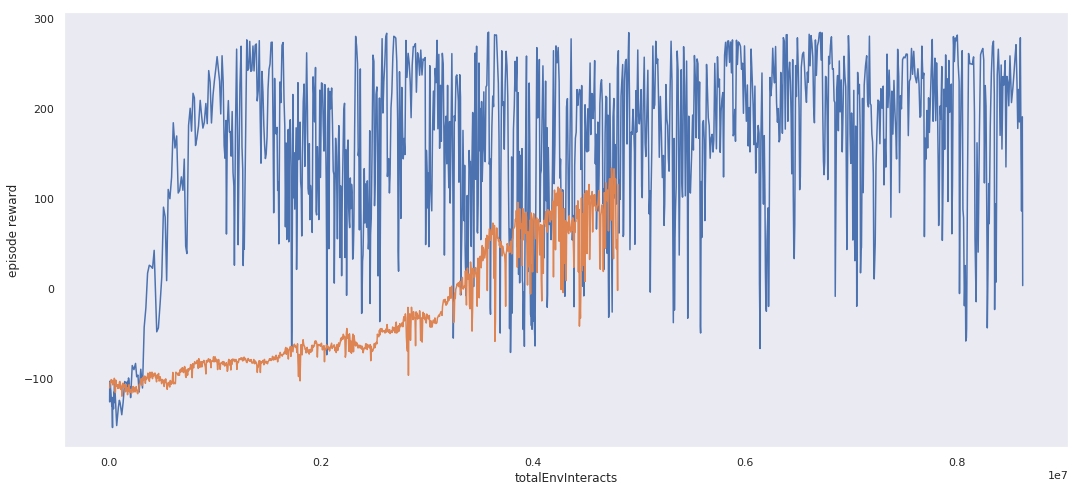

In [155]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(td3_epochs.TotalEnvInteracts, td3_epochs.AverageEpRet)
ax.plot(vpg.TotalEnvInteracts, vpg.AverageEpRet)

ax.set(xlabel='totalEnvInteracts', ylabel='episode reward')
ax.grid()

plt.show()

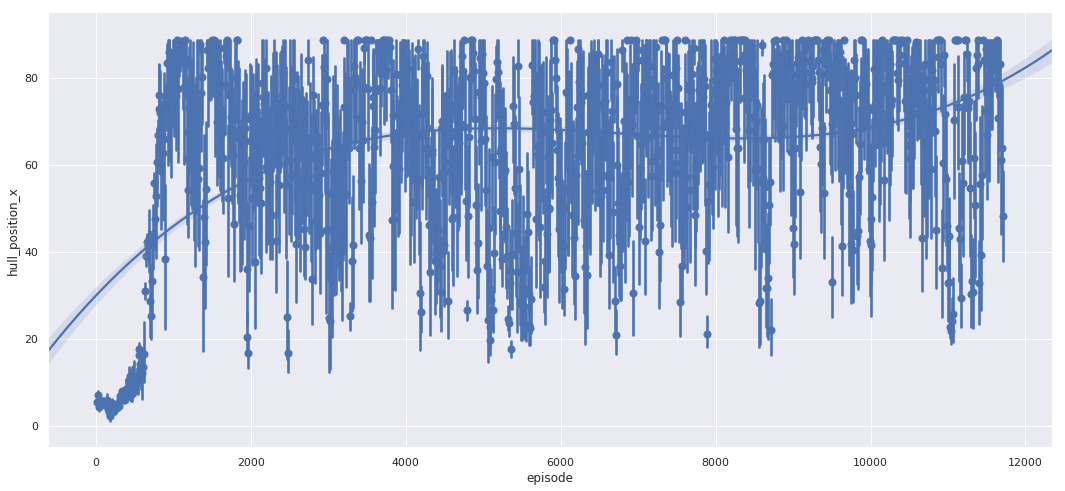

In [175]:
fig, ax = plt.subplots(figsize=(18,8))
ax.set_ylim(-5, 95)
sns.regplot(x="episode", y="hull_position_x", data=td3, order=3, x_bins=1000, ax=ax)
plt.show()

In [177]:
td3.hull_position_x.mean()

63.610322430897604

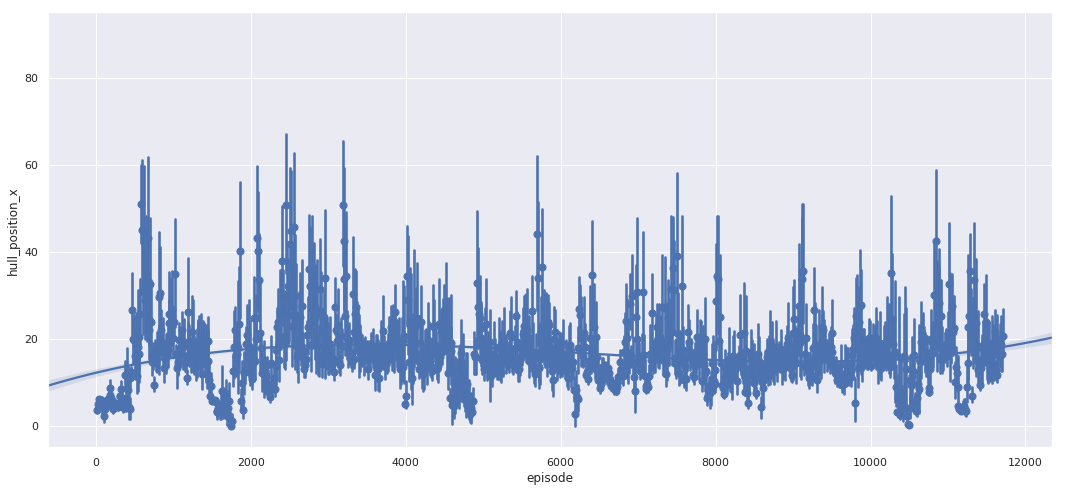

In [176]:
fig, ax = plt.subplots(figsize=(18,8))
ax.set_ylim(-5, 95)
sns.regplot(x="episode", y="hull_position_x", data=ddpg[0:11721], order=3, x_bins=1000, ax=ax)
plt.show()

In [178]:
ddpg.hull_position_x.mean()

17.103561657585715

## Output video

In [5]:
import gym
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from agents.ddpg.agent import DDPG
from agents.td3.agent import TD3

env = gym.make("BipedalWalker-v2")
video = VideoRecorder(env, base_path="./video_5_19")
agent = TD3(env)
agent.load_models(path="./", suffix="_episode_4262")

episode_rewards = []

for i in range(10):
    observation = env.reset()
    agent.reset_episode(observation)
    episode_reward = 0
    
    for t in range(1600):
        video.capture_frame()
        action = agent.get_action(observation)
        observation, reward, done, info = env.step(action)

        # Capture reward
        episode_reward += reward
        
        if done or (t == 1599):
            episode_rewards.append(episode_reward)
            break
        
video.close()
env.close()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               10000     
_________________________________________________________________
activation_1 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
actions (Dense)              (None, 4)                 1204      
Total params: 131,504
Trainable params: 131,504
Non-trainable params: 

/usr/local/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Instructions for updating:
Use tf.cast instead.


In [20]:
episode_rewards

[-64.63630855472388,
 -65.40145688717936,
 283.77416304193423,
 158.5959029122323,
 11.16425019156631,
 24.66269764981162,
 -33.590033672797816,
 283.1281403176765,
 88.02646811244972,
 -64.78365477496078]